# Project Assignment 2: Data Preprocessing

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci

data_file_path = "heart.csv"
dataset = pd.read_csv(data_file_path)

# explore data using the following functions:
print(dataset.shape)
print(dataset.head())
print(dataset.tail())
dataset.info()

(918, 12)
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144        

In [61]:
# null value checks

print(dataset.isnull().sum())
# no null values! :) So there is no need for this step.

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


<Figure size 500x500 with 0 Axes>

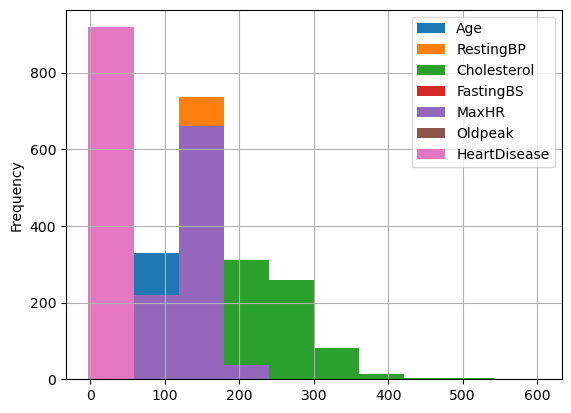

<Figure size 1500x500 with 0 Axes>

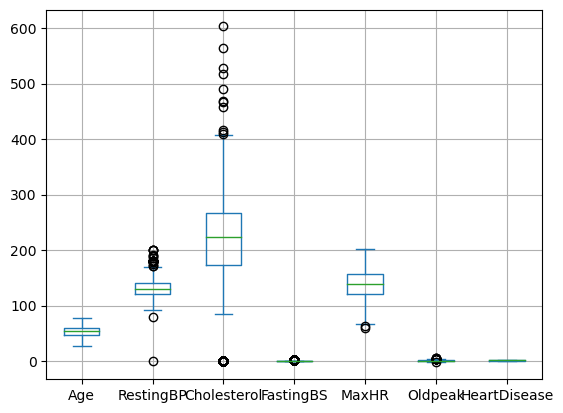

In [62]:
# summarize numerical features with describe
# investigate spread of numerical features with histograms and box plots.

print(dataset.describe())

plt.figure(figsize=(5,5))
numeric_features = dataset.select_dtypes("number").columns
dataset[numeric_features].plot.hist()
plt.grid(True)
plt.show()

plt.figure(figsize=(15,5))
dataset[numeric_features].plot.box()
plt.grid(True)
plt.show()

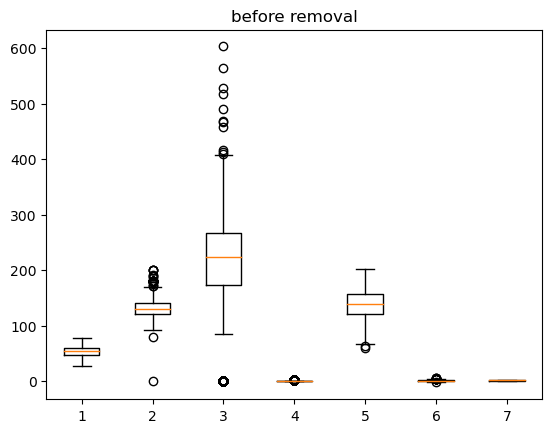

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')
              Age   RestingBP  Cholesterol  FastingBS       MaxHR     Oldpeak  \
count  588.000000  588.000000   588.000000      588.0  588.000000  588.000000   
mean    51.722789  130.375850   239.064626        0.0  141.755102    0.802211   
std      9.542500   15.238699    50.738558        0.0   24.144890    0.961727   
min     28.000000   92.000000    85.000000        0.0   71.000000   -0.100000   
25%     44.750000  120.000000   205.000000        0.0  124.000000    0.000000   
50%     52.000000  130.000000   234.000000        0.0  142.000000    0.300000   
75%     58.000000  140.000000   272.000000        0.0  160.000000    1.500000   
max     77.000000  170.000000   404.000000        0.0  202.000000    3.600000   

       HeartDisease  
count    588.000000  
mean       0.426871  
std        0.495044  
min        0.000000  
25%        0.000000  
50%        0.0000

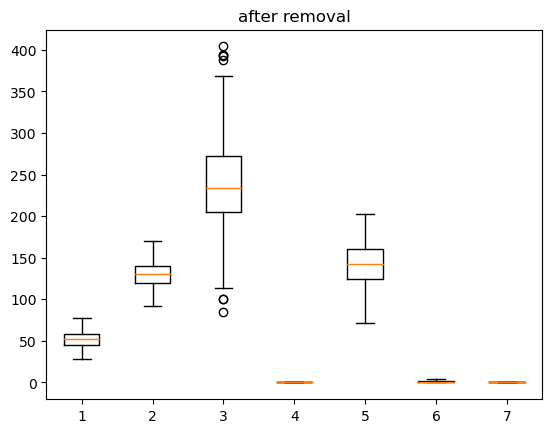

In [63]:
# outlier removal!

# get numerical dataframe:
numerical_data = dataset.select_dtypes(include='number')
plt.boxplot(numerical_data)
plt.title("before removal")
plt.show()

# get rid of outliers: IQR method
def remove_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return column[(column >= lower_bound) & (column <= upper_bound)]

# column labels to iterate through
numerical_columns = dataset.select_dtypes(include='number').columns
print(numerical_columns)

# make copy of dataframe and apply filtered numeric parts to it
dataset_filtered = dataset.copy()
for col in numerical_columns:
    dataset_filtered[col] = remove_outliers(dataset[col])

# drop na values
dataset_filtered = dataset_filtered.dropna()
print(dataset_filtered.describe())
print(dataset_filtered.head())
print(dataset_filtered.isna().sum())
print(dataset_filtered.shape)

numerical_data = dataset_filtered.select_dtypes('number')
plt.boxplot(numerical_data)
plt.title("after removal")
plt.show()

In [64]:
# data normalization: minmax scaling
numeric_columns = dataset_filtered.select_dtypes('number').columns

scaled_data = dataset_filtered.copy()
for col in numeric_columns:
    minimum = dataset_filtered[col].min()
    maximum = dataset_filtered[col].max()
    if maximum != minimum:
        scaled_data[col] = dataset_filtered[col].apply(
            lambda x: (x - minimum) / (maximum - minimum)
        )

print(scaled_data.describe())
print(scaled_data.head())

              Age   RestingBP  Cholesterol  FastingBS       MaxHR     Oldpeak  \
count  588.000000  588.000000   588.000000      588.0  588.000000  588.000000   
mean     0.484139    0.491998     0.482961        0.0    0.540115    0.243841   
std      0.194745    0.195368     0.159055        0.0    0.184312    0.259926   
min      0.000000    0.000000     0.000000        0.0    0.000000    0.000000   
25%      0.341837    0.358974     0.376176        0.0    0.404580    0.027027   
50%      0.489796    0.487179     0.467085        0.0    0.541985    0.108108   
75%      0.612245    0.615385     0.586207        0.0    0.679389    0.432432   
max      1.000000    1.000000     1.000000        0.0    1.000000    1.000000   

       HeartDisease  
count    588.000000  
mean       0.426871  
std        0.495044  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000  
        Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS Resting